# Preprocessing

### Loading The 'Difference' Dataset

In [5]:
import pandas as pd

# Step 1: Load the files
df = pd.read_csv('social_demographic.csv')
data_1_subset = pd.read_csv('merged_difference_subset.csv')

# Step 2: Merge on 'nomem_encr'
merged_df = df.merge(data_1_subset, on='nomem_encr', how='left')
#merged_df = merged_df.dropna()


merged_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           995 non-null    float64
 1   gender                        995 non-null    int64  
 2   sex                           995 non-null    float64
 3   education                     993 non-null    float64
 4   Employment_status             995 non-null    int64  
 5   Personal_Net_Income_Category  993 non-null    float64
 6   Ethnic_Background             961 non-null    float64
 7   living_arrangement            995 non-null    float64
 8   marital_status                995 non-null    float64
 9   hours_on_social_media         995 non-null    float64
 10  loneliness_score              995 non-null    int64  
 11  social_media_frequency        986 non-null    float64
 12  mhi5_class_2022               994 non-null    float64
 13  gende

In [7]:
nan_count = merged_df['difference_mhi5'].isna().sum()
print(nan_count)

100


# Converting the 'Difference"score into 3 Classes.

33% grens: -4.00, 66% grens: 4.00


C:\Users\u1246538\AppData\Local\Temp\ipykernel_14380\4095590591.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_clean['diff_class'] = merged_df_clean['difference_mhi5'].apply(lambda x: assign_class(x, q1, q2))


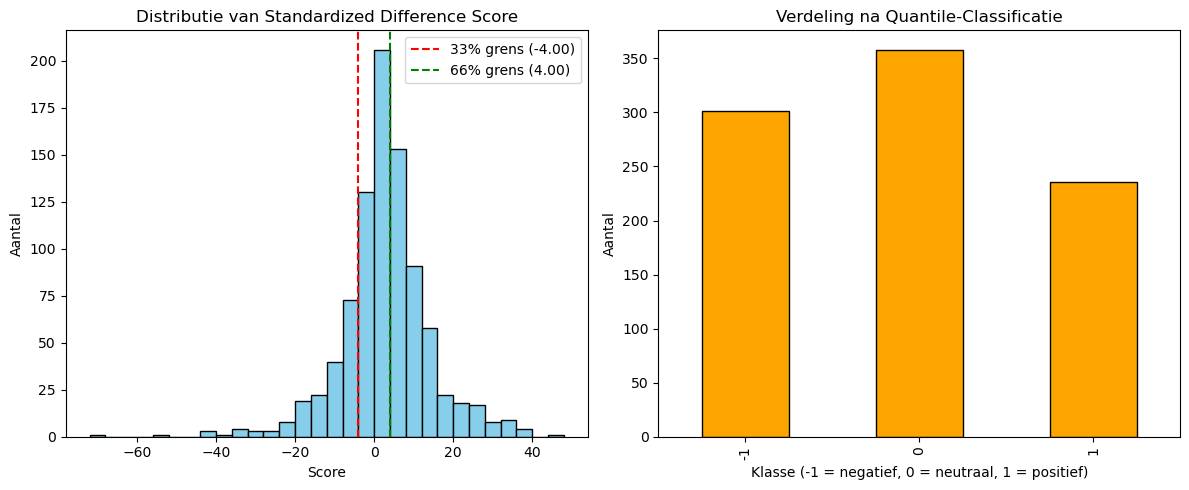

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Maak kolom numeriek + verwijder NaNs
merged_df['difference_mhi5'] = pd.to_numeric(merged_df['difference_mhi5'], errors='coerce')
merged_df_clean = merged_df.dropna(subset=['difference_mhi5'])

# 2. Bepaal quantile-grenzen op schone data
q1, q2 = np.quantile(merged_df_clean['difference_mhi5'], [0.33, 0.66])
print(f"33% grens: {q1:.2f}, 66% grens: {q2:.2f}")

# 3. Classificeer scores
def assign_class(score, q1, q2):
    if score <= q1:
        return -1
    elif score <= q2:
        return 0
    else:
        return 1

merged_df_clean['diff_class'] = merged_df_clean['difference_mhi5'].apply(lambda x: assign_class(x, q1, q2))

# 4. Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(merged_df_clean['difference_mhi5'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(q1, color='red', linestyle='--', label=f'33% grens ({q1:.2f})')
plt.axvline(q2, color='green', linestyle='--', label=f'66% grens ({q2:.2f})')
plt.title('Distributie van Standardized Difference Score')
plt.xlabel('Score')
plt.ylabel('Aantal')
plt.legend()

plt.subplot(1, 2, 2)
merged_df_clean['diff_class'].value_counts().sort_index().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Verdeling na Quantile-Classificatie')
plt.xlabel('Klasse (-1 = negatief, 0 = neutraal, 1 = positief)')
plt.ylabel('Aantal')

plt.tight_layout()
plt.show()


### ***Split dataset into X and y***

In [10]:
# Step 3: Define columns to drop
target_column_2022 = ['mhi5_class_2022']
possible_error_analysis_columns = [
    'gender', 'Religion', 'Religious_Membership',
    'political_interest', 'mhi5_std_score_2022',
    'gender.1', 'Ethnic_Background', 'social_media_frequency', 'change_class'
]
keep_columns = target_column_2022 + possible_error_analysis_columns

# Step 4: Drop those columns from merged dataframe
df_final = merged_df_clean.drop(columns=keep_columns, errors='ignore')

# Step 2: Drop any rows with missing values (important ones only)
df_1= df_final.dropna()

# Step 3: Now split into X and y
X = df_1.drop(columns=['difference_mhi5', 'diff_class', 'nomem_encr'])
y = df_1['diff_class']

# (Optional) Check
print(X.shape, y.shape)
print(X.isna().sum().sum(), "missing values in X")
print(y.isna().sum(), "missing values in y")



(891, 9) (891,)
0 missing values in X
0 missing values in y


In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 993
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           891 non-null    float64
 1   sex                           891 non-null    float64
 2   education                     891 non-null    float64
 3   Employment_status             891 non-null    int64  
 4   Personal_Net_Income_Category  891 non-null    float64
 5   living_arrangement            891 non-null    float64
 6   marital_status                891 non-null    float64
 7   hours_on_social_media         891 non-null    float64
 8   loneliness_score              891 non-null    int64  
 9   nomem_encr                    891 non-null    int64  
 10  difference_mhi5               891 non-null    float64
 11  diff_class                    891 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 90.5 KB


### ***Train_Test_Split***


In [22]:
# from sklearn.model_selection import train_test_split

# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X,
#     y,
#     test_size=0.2,
#     random_state=42,
#     stratify=y  # keep class distribution balanced
# )

# # Optional: Check results
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)

# # Check class distribution
# print("\nTrain class distribution:\n", y_train.value_counts(normalize=True))
# print("\nTest class distribution:\n", y_test.value_counts(normalize=True))


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Split
X_train, X_test, y_train_raw, y_test_raw = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 2: Encode
le = LabelEncoder()
y_train = le.fit_transform(y_train_raw)
y_test = le.transform(y_test_raw)

# Optional: Save encoder
import joblib
joblib.dump(le, 'label_encoder_diff_class.pkl')


['label_encoder_diff_class.pkl']

## **Modelling: Training the 4 machine learning models**

### ***logistic regression***

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import joblib

# Sampler dictionary
samplers = {
    'none': None,
    'undersample': RandomUnderSampler(random_state=42),
    'smotetomek': SMOTETomek(random_state=42)
}

# Hyperparameter grid
param_grid_lr = {
    'sampler': [samplers['none'], samplers['undersample'], samplers['smotetomek']],
    'classifier__C': [0.01, 0.1, 1, 10]
}

# Pipeline
pipeline_lr = ImbPipeline([
    ('sampler', SMOTETomek()),  # wordt geswitched op basis van de param_grid_lr
    ('scaler', StandardScaler()), # hier doen na datasplit anders dataleakage niet bij preprocessing.
    ('classifier', LogisticRegression(max_iter=1000, multi_class= 'multinomial', solver= 'lbfgs', random_state=42))
    # multinomial for true multiclass, lbfgs handles it well
])

# GridSearch
grid_lr = GridSearchCV(pipeline_lr, param_grid=param_grid_lr, cv=3, scoring='f1_macro', n_jobs=-1) # f1_macro for multicalss, cv gaat automatisch stratifiedsplit. hier zetten ze in plats van 3 ook inner_cv

# nested cross_validation
from sklearn.model_selection import cross_validate
nested_cv_search = cross_validate(
    grid_lr,
    X=X_train,
    y=y_train,
    cv=5, #hier kunnen ze ook outer_cv zetten ipv 5 
    scoring='f1_macro',
    error_score='raise',
    return_estimator=True,
    return_train_score=False,
    verbose=1,
    n_jobs=-1
)
print("Nested CV results:")
print(nested_cv_search['test_score'])
print("Mean F1_macro score:", nested_cv_search['test_score'].mean())
print('STD F1_macro score:', nested_cv_search['test_score'].std())
best_score_index = np.argmax(nested_cv_search['test_score'])
best_model = nested_cv_search['estimator'][best_score_index]
print('Parameters of the best model:', best_model.best_params_)
# print the parameters of all 5 models
for i, model in enumerate(nested_cv_search['estimator']):
    print(f"Model {i+1} parameters: {model.best_params_}")

# sla de nested_cv op
joblib.dump(nested_cv_search, 'nested_cv_search_lr_diff_Socio+demo.pkl')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Nested CV results:
[0.34589701 0.36708871 0.37060802 0.34495751 0.36604683]
Mean F1_macro score: 0.3589196152333636
STD F1_macro score: 0.011123656125372361
Parameters of the best model: {'classifier__C': 0.01, 'sampler': RandomUnderSampler(random_state=42)}
Model 1 parameters: {'classifier__C': 1, 'sampler': RandomUnderSampler(random_state=42)}
Model 2 parameters: {'classifier__C': 0.1, 'sampler': RandomUnderSampler(random_state=42)}
Model 3 parameters: {'classifier__C': 0.01, 'sampler': RandomUnderSampler(random_state=42)}
Model 4 parameters: {'classifier__C': 10, 'sampler': SMOTETomek(random_state=42)}
Model 5 parameters: {'classifier__C': 10, 'sampler': SMOTETomek(random_state=42)}


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished


['nested_cv_search_lr_diff_Socio+demo.pkl']

### *** random Forest***

In [38]:
import optuna
from optuna.integration import OptunaSearchCV
from optuna.distributions import IntDistribution, CategoricalDistribution
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np
import joblib

# Set Optuna logging to warning only
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Optuna study
optuna_study = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42)
)

# Sampler dictionary
samplers = {
    'none': 'passthrough',
    'undersample': RandomUnderSampler(random_state=42),
    'smotetomek': SMOTETomek(random_state=42)
}

sampler_map = {
    'none': 'passthrough',
    'undersample': samplers['undersample'],
    'smotetomek': samplers['smotetomek']
}

# Custom pipeline class to resolve sampler names
class SamplerResolvingPipeline(ImbPipeline):
    def set_params(self, **kwargs):
        if 'sampler' in kwargs and isinstance(kwargs['sampler'], str):
            kwargs['sampler'] = sampler_map[kwargs['sampler']]
        return super().set_params(**kwargs)

# Define pipeline
pipeline_rf = SamplerResolvingPipeline([
    ('sampler', 'passthrough'),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Define search space
param_distributions_rf = {
    'sampler': CategoricalDistribution(['none', 'undersample', 'smotetomek']),
    'classifier__n_estimators': IntDistribution(50, 250, step=50),
    'classifier__max_depth': CategoricalDistribution([None, 5, 10, 15, 20]),
    'classifier__max_features': CategoricalDistribution(['sqrt', 'log2']),
    'classifier__min_samples_split': IntDistribution(2, 10),
    'classifier__min_samples_leaf': IntDistribution(1, 4)
}

# OptunaSearchCV setup for multiclass
optuna_search_rf = OptunaSearchCV(
    estimator=pipeline_rf,
    param_distributions=param_distributions_rf,
    cv=3,
    n_trials=50,
    study=optuna_study,
    scoring='f1_macro',  # <<< Use macro F1 for multiclass
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Nested CV
nested_cv_search = cross_validate(
    optuna_search_rf,
    X=X_train,  
    y=y_train,  # replace with your multiclass `difference_score` target
    cv=5,
    scoring='f1_macro',  # f1_macro for multi class 
    error_score='raise',
    return_estimator=True,
    return_train_score=False,
    verbose=1,
    n_jobs=-1
)

# Results
print("Nested CV results:")
print(nested_cv_search['test_score'])
print("Mean F1_macro score:", nested_cv_search['test_score'].mean())
print("STD F1_macro score:", nested_cv_search['test_score'].std())

# Best model
best_score_index = np.argmax(nested_cv_search['test_score'])
best_model = nested_cv_search['estimator'][best_score_index]
print('Parameters of the best model:', best_model.best_params_)

# All model parameters
for i, model in enumerate(nested_cv_search['estimator']):
    print(f"Model {i+1} parameters: {model.best_params_}")

# Save
joblib.dump(nested_cv_search, 'nested_cv_search_rf_diff_Socio+demo.pkl')


C:\Users\u1246538\AppData\Local\Temp\ipykernel_14380\234071653.py:60: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search_rf = OptunaSearchCV(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
C:\Users\u1246538\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:125: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  new_object = klass(**new_object_params)
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished


Nested CV results:
[0.38718797 0.332024   0.34377397 0.29004893 0.28025521]
Mean F1_macro score: 0.3266580155301949
STD F1_macro score: 0.03867575498039085
Parameters of the best model: {'sampler': 'smotetomek', 'classifier__n_estimators': 50, 'classifier__max_depth': 15, 'classifier__max_features': 'log2', 'classifier__min_samples_split': 7, 'classifier__min_samples_leaf': 2}
Model 1 parameters: {'sampler': 'smotetomek', 'classifier__n_estimators': 50, 'classifier__max_depth': 15, 'classifier__max_features': 'log2', 'classifier__min_samples_split': 7, 'classifier__min_samples_leaf': 2}
Model 2 parameters: {'sampler': 'smotetomek', 'classifier__n_estimators': 100, 'classifier__max_depth': 20, 'classifier__max_features': 'log2', 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2}
Model 3 parameters: {'sampler': 'undersample', 'classifier__n_estimators': 250, 'classifier__max_depth': 20, 'classifier__max_features': 'log2', 'classifier__min_samples_split': 3, 'classifie

['nested_cv_search_rf_diff_Socio+demo.pkl']

### ***SVM***

In [34]:
import optuna
from optuna.integration import OptunaSearchCV
from optuna.distributions import CategoricalDistribution, FloatDistribution, IntDistribution
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_validate
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import joblib

# 1. Sampler map
sampler_map = {
    'none': 'passthrough',
    'undersample': RandomUnderSampler(random_state=42),
    'smotetomek': SMOTETomek(random_state=42)
}

# 2. Custom pipeline
class SamplerResolvingPipeline(ImbPipeline):
    def set_params(self, **kwargs):
        if 'sampler' in kwargs and isinstance(kwargs['sampler'], str):
            kwargs['sampler'] = sampler_map[kwargs['sampler']]
        return super().set_params(**kwargs)

pipeline = SamplerResolvingPipeline([
    ('sampler', 'passthrough'),
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, random_state=42))  # OvR is default for multiclass
])

# 3. Optuna hyperparameter space
param_distributions = {
    'sampler': CategoricalDistribution(['none', 'undersample', 'smotetomek']),
    'classifier__kernel': CategoricalDistribution(['linear', 'rbf', 'poly']),
    'classifier__C': FloatDistribution(0.1, 100, log=True),
    'classifier__gamma': CategoricalDistribution(['scale', 'auto', 0.1, 0.01, 0.001]),
    'classifier__degree': IntDistribution(2, 5),
    'classifier__class_weight': CategoricalDistribution([None, 'balanced'])
}

# 4. Optuna study
optuna.logging.set_verbosity(optuna.logging.WARNING)
optuna_study = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42)
)

# 5. OptunaSearchCV (inner 3-fold)
optuna_search = OptunaSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    cv=3,
    n_trials=50,
    study=optuna_study,
    scoring='f1_macro',  # <-- change to macro for multiclass
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# 6. Outer nested CV (5-fold)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
nested_cv_results = cross_validate(
    optuna_search,
    X=X_train,
    y=y_train,  # already label-encoded [0, 1, 2]
    cv=outer_cv,
    scoring='f1_macro',  
    return_estimator=True,
    return_train_score=False,
    verbose=1,
    n_jobs=-1
)

# 7. Results
print("Nested CV F1 scores:", nested_cv_results['test_score'])
print("Mean F1 score:", np.mean(nested_cv_results['test_score']))
print("STD F1 score:", np.std(nested_cv_results['test_score']))

print("Best parameters per fold:")
for i, model in enumerate(nested_cv_results['estimator']):
    print(f"Fold {i+1}: {model.best_params_}")

best_score_index = np.argmax(nested_cv_results['test_score'])
best_model = nested_cv_results['estimator'][best_score_index]
print("Parameters of the best overall model:", best_model.best_params_)

# Save
joblib.dump(nested_cv_results, 'nested_cv_optuna_svm_diff_Socio+demo.pkl')


C:\Users\u1246538\AppData\Local\Temp\ipykernel_14380\4165922376.py:51: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
C:\Users\u1246538\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:125: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  new_object = klass(**new_object_params)


Nested CV F1 scores: [0.35672084 0.29771832 0.37798783 0.32790407 0.32862488]
Mean F1 score: 0.3377911876442595
STD F1 score: 0.027428862434191237
Best parameters per fold:
Fold 1: {'sampler': 'smotetomek', 'classifier__kernel': 'rbf', 'classifier__C': 0.4009113287141712, 'classifier__gamma': 'auto', 'classifier__degree': 3, 'classifier__class_weight': 'balanced'}
Fold 2: {'sampler': 'none', 'classifier__kernel': 'rbf', 'classifier__C': 86.13013180532216, 'classifier__gamma': 'scale', 'classifier__degree': 2, 'classifier__class_weight': 'balanced'}
Fold 3: {'sampler': 'smotetomek', 'classifier__kernel': 'linear', 'classifier__C': 0.22923342721687703, 'classifier__gamma': 0.01, 'classifier__degree': 2, 'classifier__class_weight': 'balanced'}
Fold 4: {'sampler': 'undersample', 'classifier__kernel': 'rbf', 'classifier__C': 0.5068184687257578, 'classifier__gamma': 'auto', 'classifier__degree': 4, 'classifier__class_weight': None}
Fold 5: {'sampler': 'none', 'classifier__kernel': 'linear', 

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.1s finished


['nested_cv_optuna_svm_diff_Socio+demo.pkl']

### ***XGBoost***

In [30]:
import optuna
from optuna.integration import OptunaSearchCV
from optuna.distributions import CategoricalDistribution, FloatDistribution, IntDistribution
import numpy as np
import joblib
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_validate
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler


# === Sampler map ===
sampler_map = {
    'none': 'passthrough',
    'undersample': RandomUnderSampler(random_state=42),
    'smotetomek': SMOTETomek(random_state=42)
}

# === Custom pipeline ===
class SamplerResolvingPipeline(ImbPipeline):
    def set_params(self, **kwargs):
        if 'sampler' in kwargs and isinstance(kwargs['sampler'], str):
            kwargs['sampler'] = sampler_map[kwargs['sampler']]
        return super().set_params(**kwargs)

# === Define pipeline ===
pipeline = SamplerResolvingPipeline([
    ('sampler', 'passthrough'),
    ('scaler', StandardScaler()),
    ('classifier', xgb.XGBClassifier(
        objective='multi:softprob',
        num_class=3,  # 3 encoded classes: [0, 1, 2]
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=42
    ))
])

# === Optuna search space ===
param_distributions = {
    'sampler': CategoricalDistribution(['none', 'undersample', 'smotetomek']),
    'classifier__n_estimators': CategoricalDistribution([50, 100, 200, 400, 500]),
    'classifier__learning_rate': FloatDistribution(0.01, 0.1, log=True),
    'classifier__max_depth': CategoricalDistribution([2, 4, 6, 10, 15]),
    'classifier__min_child_weight': CategoricalDistribution([1, 3, 5]),
    'classifier__subsample': CategoricalDistribution([0.6, 0.8, 1.0]),
    'classifier__colsample_bytree': CategoricalDistribution([0.6, 0.8, 1.0]),
    'classifier__gamma': FloatDistribution(0.0, 1.0, step=0.1),
    'classifier__reg_alpha': FloatDistribution(0.001, 5.0, log=True),
    'classifier__reg_lambda': FloatDistribution(0.001, 5.0, log=True),
}

# === Optuna study ===
optuna.logging.set_verbosity(optuna.logging.WARNING)
optuna_study = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42)
)

# === Inner CV with OptunaSearchCV ===
optuna_search = OptunaSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    cv=3,
    n_trials=50,
    study=optuna_study,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# === Outer nested cross-validation ===
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
nested_cv_results = cross_validate(
    optuna_search,
    X=X_train,
    y=y_train,  # Already encoded!
    cv=outer_cv,
    scoring='f1_macro',
    return_estimator=True,
    return_train_score=False,
    verbose=1,
    n_jobs=-1
)

# === Print results ===
print("Nested CV F1 scores:", nested_cv_results['test_score'])
print("Mean F1 score:", np.mean(nested_cv_results['test_score']))
print("STD F1 score:", np.std(nested_cv_results['test_score']))
print("Best parameters per fold:")
for i, model in enumerate(nested_cv_results['estimator']):
    print(f"Fold {i+1}: {model.best_params_}")


# === Best model from CV ===
best_score_index = np.argmax(nested_cv_results['test_score'])
best_model = nested_cv_results['estimator'][best_score_index]
print(f"Best model (fold {best_score_index+1}) parameters:")
print(best_model.best_params_)

# === Save model and encoder ===
joblib.dump(nested_cv_results, 'nested_cv_optuna_xgb_diff_Socio+demo.pkl')
# le already saved earlier as:
# joblib.dump(le, "label_encoder_difference_score.pkl")


C:\Users\u1246538\AppData\Local\Temp\ipykernel_14380\2740127052.py:63: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
C:\Users\u1246538\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:125: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  new_object = klass(**new_object_params)
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.1s finished


Nested CV F1 scores: [0.32073112 0.32924953 0.32519732 0.35017597 0.33998997]
Mean F1 score: 0.3330687824290209
STD F1 score: 0.010670737399900806
Best parameters per fold:
Fold 1: {'sampler': 'smotetomek', 'classifier__n_estimators': 400, 'classifier__learning_rate': 0.04243111085081942, 'classifier__max_depth': 2, 'classifier__min_child_weight': 3, 'classifier__subsample': 0.6, 'classifier__colsample_bytree': 1.0, 'classifier__gamma': 0.1, 'classifier__reg_alpha': 0.0027599434425188275, 'classifier__reg_lambda': 0.11471294916268705}
Fold 2: {'sampler': 'undersample', 'classifier__n_estimators': 500, 'classifier__learning_rate': 0.010058356439583426, 'classifier__max_depth': 10, 'classifier__min_child_weight': 5, 'classifier__subsample': 1.0, 'classifier__colsample_bytree': 0.6, 'classifier__gamma': 0.2, 'classifier__reg_alpha': 0.0047350369916936705, 'classifier__reg_lambda': 0.006033968975334539}
Fold 3: {'sampler': 'smotetomek', 'classifier__n_estimators': 50, 'classifier__learning

['nested_cv_optuna_xgb_diff_Socio+demo.pkl']

## **Find Best Model( highest mean F1_macro) and test on Hold_out Test Set**

### More Evaluation metrics

LogisticRegression: Mean F1_macro = 0.3589, Std = 0.0111
RandomForest: Mean F1_macro = 0.3267, Std = 0.0387
SVM: Mean F1_macro = 0.3378, Std = 0.0274
XGBoost: Mean F1_macro = 0.3331, Std = 0.0107

Best model: LogisticRegression (fold 3)
Best estimator params: {'classifier__C': 0.01, 'sampler': RandomUnderSampler(random_state=42)}

=== Classification Report - LogisticRegression ===
              precision    recall  f1-score   support

          -1       0.31      0.30      0.30        60
           0       0.45      0.44      0.45        72
           1       0.24      0.26      0.25        47

    accuracy                           0.35       179
   macro avg       0.33      0.33      0.33       179
weighted avg       0.35      0.35      0.35       179



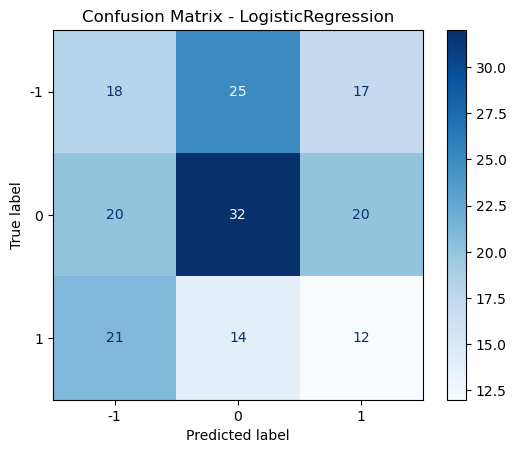

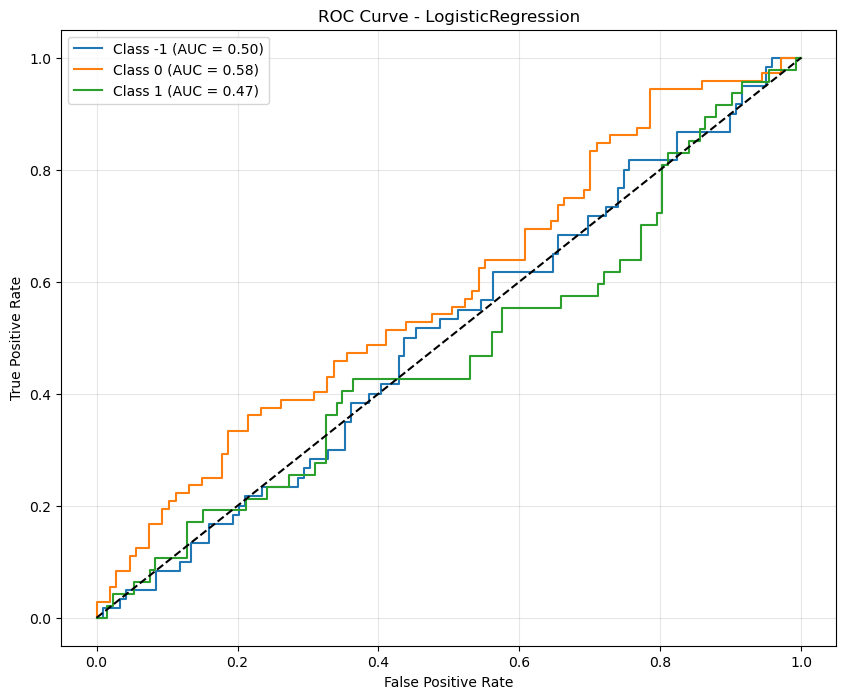

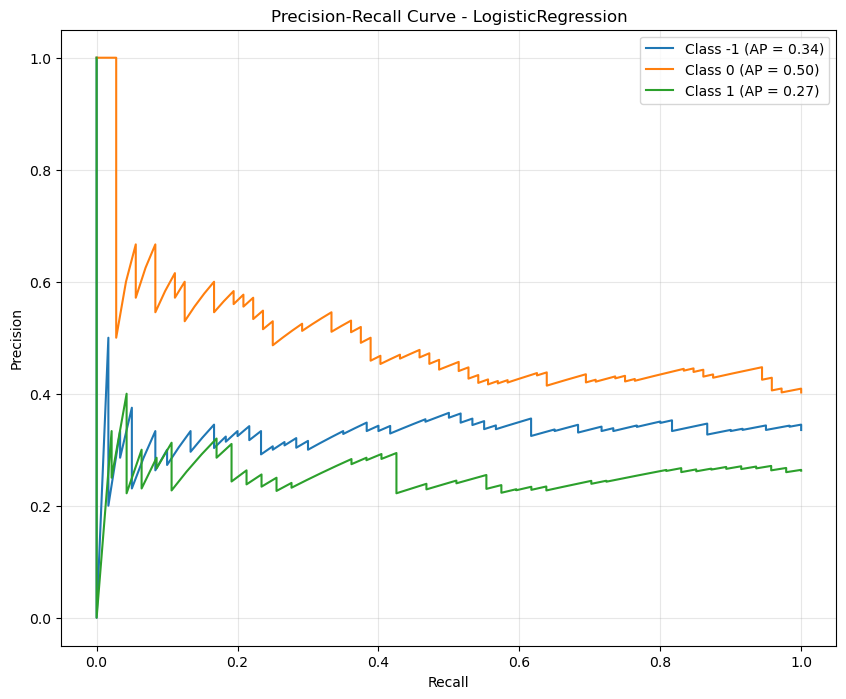

Macro AUC-ROC: 0.5201
Macro Average Precision: 0.3689

Calculating Permutation Feature Importance...


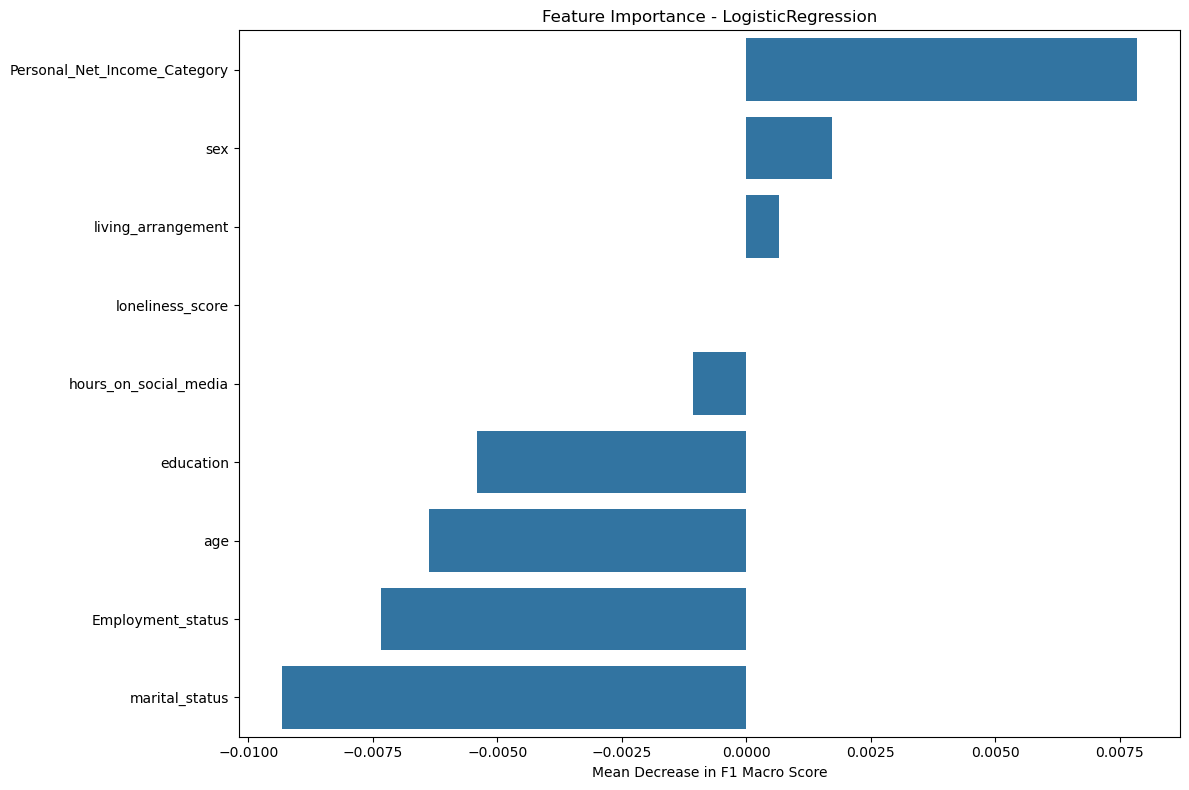


Top 10 Most Important Features:
Personal_Net_Income_Category: 0.0078
sex: 0.0017
living_arrangement: 0.0007
loneliness_score: 0.0000
hours_on_social_media: -0.0011
education: -0.0054
age: -0.0064
Employment_status: -0.0073
marital_status: -0.0093


In [42]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score
)
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

# === Step 1: Load encoder and test labels ===
le = joblib.load("label_encoder_diff_class.pkl")
y_test_encoded = le.transform(y_test_raw)  # Assuming y_test_raw is the original (unencoded) labels

# === Step 2: Load models ===
models_info = {
    "LogisticRegression": joblib.load("nested_cv_search_lr_diff_Socio+demo.pkl"),
    "RandomForest": joblib.load("nested_cv_search_rf_diff_Socio+demo.pkl"),
    "SVM": joblib.load("nested_cv_optuna_svm_diff_Socio+demo.pkl"),
    "XGBoost": joblib.load("nested_cv_optuna_xgb_diff_Socio+demo.pkl"),
}

# === Step 3: Compare mean F1_macro scores ===
for name, result in models_info.items():
    mean_f1 = np.mean(result['test_score'])
    std_f1 = np.std(result['test_score'])
    print(f"{name}: Mean F1_macro = {mean_f1:.4f}, Std = {std_f1:.4f}")

# === Step 4: Select best model ===
best_model_name = max(models_info, key=lambda name: np.mean(models_info[name]['test_score']))
best_model_cv = models_info[best_model_name]
best_index = np.argmax(best_model_cv['test_score'])
best_estimator = best_model_cv['estimator'][best_index]

print(f"\nBest model: {best_model_name} (fold {best_index+1})")
print("Best estimator params:", best_estimator.best_params_)

# === Step 5: Predict and decode ===
y_pred_encoded = best_estimator.predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)  # Human-readable
y_true = le.inverse_transform(y_test_encoded)

# === Step 6: Classification Report ===
print(f"\n=== Classification Report - {best_model_name} ===")
target_names = [str(c) for c in le.classes_]
print(classification_report(y_test_encoded, y_pred_encoded, target_names=target_names))

# === Step 7: Confusion Matrix ===
cm = confusion_matrix(y_test_encoded, y_pred_encoded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

# === Step 8: ROC & PR Curves (One-vs-Rest) ===
if hasattr(best_estimator, "predict_proba"):
    y_proba = best_estimator.predict_proba(X_test)

    fpr, tpr, roc_auc = {}, {}, {}
    precision, recall, pr_auc = {}, {}, {}
    n_classes = y_proba.shape[1]

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_encoded == i, y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        precision[i], recall[i], _ = precision_recall_curve(y_test_encoded == i, y_proba[:, i])
        pr_auc[i] = average_precision_score(y_test_encoded == i, y_proba[:, i])

    # ROC Curve
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        label = f'Class {le.inverse_transform([i])[0]} (AUC = {roc_auc[i]:.2f})'
        plt.plot(fpr[i], tpr[i], label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - {best_model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # PR Curve
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        label = f'Class {le.inverse_transform([i])[0]} (AP = {pr_auc[i]:.2f})'
        plt.plot(recall[i], precision[i], label=label)
    plt.title(f'Precision-Recall Curve - {best_model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"Macro AUC-ROC: {np.mean(list(roc_auc.values())):.4f}")
    print(f"Macro Average Precision: {np.mean(list(pr_auc.values())):.4f}")
else:
    print(f"Note: {best_model_name} does not support probability predictions for ROC/PR curves.")

# === Step 9: Permutation Feature Importance ===
print("\nCalculating Permutation Feature Importance...")
result = permutation_importance(
    best_estimator,
    X_test,
    y_test_encoded,
    scoring='f1_macro',
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

feature_names = X_test.columns if hasattr(X_test, 'columns') else [f"Feature {i}" for i in range(X_test.shape[1])]
sorted_idx = result.importances_mean.argsort()[::-1]

plt.figure(figsize=(12, 8))
sns.barplot(
    x=result.importances_mean[sorted_idx],
    y=[feature_names[i] for i in sorted_idx]
)
plt.title(f"Feature Importance - {best_model_name}")
plt.xlabel("Mean Decrease in F1 Macro Score")
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
for i in sorted_idx[:10]:
    print(f"{feature_names[i]}: {result.importances_mean[i]:.4f}")


In [46]:
## To save all metrics in PDF

from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import io

# Create PDF to collect all output
with PdfPages(f"{best_model_name}_evaluation_report_diff1.pdf") as pdf:

    # === Classification Report (Text)
    report_text = classification_report(
        y_test_encoded, y_pred_encoded, target_names=[str(c) for c in le.classes_]
    )
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis('off')
    ax.text(0, 1, report_text, fontsize=10, va='top', family='monospace')
    ax.set_title("Classification Report")
    pdf.savefig(fig)
    plt.close(fig)

    # === Confusion Matrix
    fig, ax = plt.subplots()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(ax=ax, cmap='Blues')
    plt.title(f'Confusion Matrix - {best_model_name}')
    pdf.savefig(fig)
    plt.close(fig)

    # === ROC Curve
    if hasattr(best_estimator, "predict_proba"):
        fig, ax = plt.subplots(figsize=(10, 8))
        for i in range(n_classes):
            ax.plot(fpr[i], tpr[i], label=f'Class {le.inverse_transform([i])[0]} (AUC = {roc_auc[i]:.2f})')
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_title(f'ROC Curve - {best_model_name}')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend()
        ax.grid(True, alpha=0.3)
        pdf.savefig(fig)
        plt.close(fig)

        # === Precision-Recall Curve
        fig, ax = plt.subplots(figsize=(10, 8))
        for i in range(n_classes):
            ax.plot(recall[i], precision[i], label=f'Class {le.inverse_transform([i])[0]} (AP = {pr_auc[i]:.2f})')
        ax.set_title(f'Precision-Recall Curve - {best_model_name}')
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.legend()
        ax.grid(True, alpha=0.3)
        pdf.savefig(fig)
        plt.close(fig)

    # === Permutation Feature Importance
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.barplot(
        x=result.importances_mean[sorted_idx],
        y=[feature_names[i] for i in sorted_idx],
        ax=ax
    )
    ax.set_title(f"Feature Importance - {best_model_name}")
    ax.set_xlabel("Mean Decrease in F1 Macro Score")
    pdf.savefig(fig)
    plt.close(fig)

    # === Add AUC/PR macro summary
    if hasattr(best_estimator, "predict_proba"):
        fig, ax = plt.subplots(figsize=(8, 4))
        ax.axis("off")
        summary_text = f"Macro AUC-ROC: {np.mean(list(roc_auc.values())):.4f}\n" \
                       f"Macro Average Precision: {np.mean(list(pr_auc.values())):.4f}"
        ax.text(0, 1, summary_text, fontsize=10, va='top')
        ax.set_title("Macro-Averaged Metrics")
        pdf.savefig(fig)
        plt.close(fig)
